In [10]:
import sunpy.map
from sunpy.net import Fido, attrs as a
import aiapy.analysis
import astropy.time
import astropy.units as u
from astropy.coordinates import SkyCoord

In [2]:
window = 12*u.h
t_mid = astropy.time.Time('2011-04-11 12:00:42')
q = Fido.search(
    a.Time(t_mid-window/2, end=t_mid+window/2, near=t_mid),
    a.Instrument.aia,
    a.Wavelength(94*u.AA) | a.Wavelength(171*u.AA) | a.Wavelength(193*u.AA)
)

In [3]:
files = Fido.fetch(q, path='../data/{instrument}/level_1')

Files Downloaded:   0%|          | 0/3 [00:00<?, ?file/s]

In [4]:
m_171, m_193, m_94 = sunpy.map.Map(sorted(files))

In [20]:
m_193_cropped = m_193.submap(SkyCoord(Tx=-750*u.arcsec,Ty=100*u.arcsec,frame=m_193.coordinate_frame),
                             width=450*u.arcsec, height=450*u.arcsec)
m_94_cropped = m_94.reproject_to(m_193_cropped.wcs)
m_94_cropped.meta['bunit'] = m_94.unit.to_string()
m_171_cropped = m_171.reproject_to(m_193_cropped.wcs)
m_171_cropped.meta['bunit'] = m_171.unit.to_string()

In [21]:
m_94_hot = aiapy.analysis.isolate_fe18_intensity(
    m_94_cropped,
    m_171_cropped,
    m_193_cropped,
)

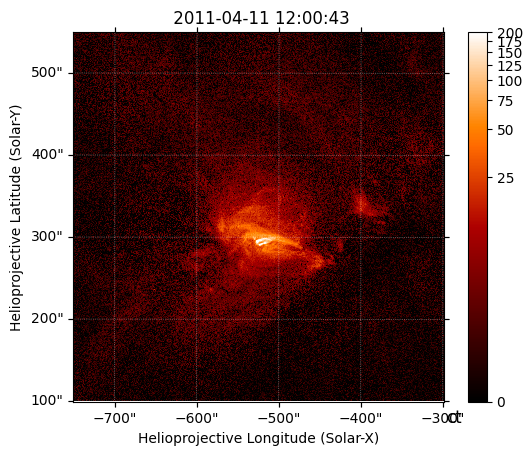

In [28]:
m_94_hot.peek(vmin=0, vmax=200, cmap='hinodexrt')

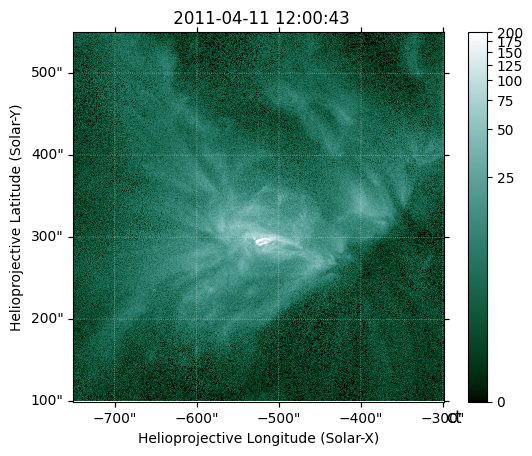

In [34]:
m_94_cropped.peek(vmin=0, vmax=200)

In [29]:
m_94_warm = m_94_cropped - m_94_hot.quantity

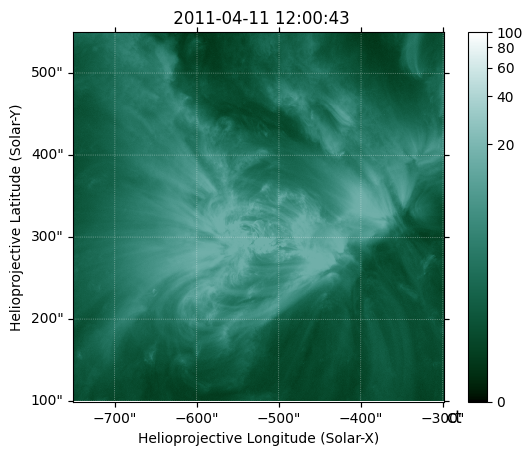

In [32]:
m_94_warm.peek(vmin=0, vmax=100)

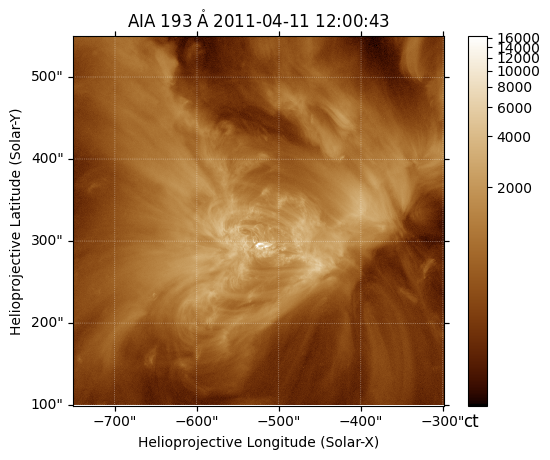

In [33]:
m_193_cropped.peek()

In [45]:
m_171.meta['date-obs']

'2011-04-11T12:00:36.34'